In [106]:
from config import *
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_list_of_floats_from_string(string):
    string = string.replace('[', '').replace(']', '').split(',')
    float_list = [float(i) for i in string]
    return float_list

def get_list_of_strings_from_string(string_list, num_of_stalls):
    string_list = string_list.replace('[', '').replace(']', '').replace("'", "").split(',')
    for i in range(num_of_stalls - len(string_list)):
        string_list.append('') # add empty strings to the list, so that the length of the list is equal to the number of stalls	
    return string_list

def convert_pd_series_to_np_array(pd_series):
    test = pd_series
    test = np.array([get_list_of_floats_from_string(i) for i in test])
    return test

import filepaths

In [6]:
result_parent_directory =  result_parent_directory
path_Sim =  path_Sim
prediction_directory =  prediction_directory
path_DataBase =  path_DataBase

path = result_parent_directory + os.sep + 'step6a_MPC_simulation_own_charging_events_c_rate'

result_directory = path + os.sep + 'simulation_results'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_stats_and_selected_stations_path = os.path.join(result_parent_directory, 'step4a_btms_sizing_sensitivity_c_rate', 'analysis', 'step4a_used_charging_depots_for_control_with_stats_a_5.0.csv')
a_value_selected = 5.0
sizing_results_parent_directory = os.path.join(result_parent_directory, 'step4a_btms_sizing_sensitivity_c_rate', 'sizing_results')

# find out in which folder the results for the selected a value are stored
for folder in os.listdir(sizing_results_parent_directory):
    _path = os.path.join(sizing_results_parent_directory, folder)
    _path = os.listdir(_path)[0]
    _path = os.path.join(sizing_results_parent_directory, folder, _path)
    df = pd.read_csv(_path, index_col=0)
    if df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[1] *365/12 == a_value_selected:
        sizing_results_directory = os.path.join(sizing_results_parent_directory, folder)
        break

path_infrastructure = os.path.join(result_parent_directory, 'step2_k_means_clustering', 'infrastructure_removed_zeros.csv')

In [7]:
df_selected_stations_and_stats = pd.read_csv(sizing_results_stats_and_selected_stations_path, index_col=0)
df_selected_stations_and_stats.head()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
1013,104.999795,14.794588,9.080353,11.947528,4.821713,21.027881,9.246104,45.068573,0.328268,0.201479,...,0.106986,0.466575,0.205156,658.416667,2.0,4.181745,0.666876,0.340729,2.333318,0.300001
104,150.000045,49.315054,12.971962,2.315101,0.934315,15.287063,1.791456,66.393573,0.742768,0.195380,...,0.014072,0.230249,0.026982,1057.666667,2.0,0.567224,0.080445,0.149075,1.000001,0.500000
1049,133.719748,5.352412,11.564046,8.969469,3.619845,20.533515,6.955067,32.840994,0.162980,0.352122,...,0.110223,0.625240,0.211780,385.375000,2.0,2.464274,0.855069,0.567715,8.213616,0.108535
1080,374.999999,24.657535,32.429894,9.758533,3.938291,42.188428,7.888235,74.734198,0.329936,0.433936,...,0.052697,0.564513,0.105551,803.000000,2.0,0.948889,0.443130,0.241483,5.000000,0.166667
1083,225.000002,24.657534,19.457937,10.591644,4.274513,30.049580,8.207081,62.914196,0.391923,0.309277,...,0.067942,0.477628,0.130449,845.791667,2.0,1.729630,0.460121,0.254116,3.000000,0.250000


In [8]:
df_infrastructure = pd.read_csv(path_infrastructure, index_col=0)
df_infrastructure.head()

,parkingType,pricingModel,chargingPointType,numStalls,feeInCents,reservedFor,parkingZoneId,locationX,locationY
taz,,,,,,,,,
1008,Workplace,FlatFee,DepotXFC(300.0|DC),6,0,ridehail(GlobalRHM),depot-1008-34,557763.343469,4.200385e+06
1013,Workplace,FlatFee,DepotXFC(300.0|DC),2,0,ridehail(GlobalRHM),depot-1013-128,586536.564655,4.239191e+06
1033,Workplace,FlatFee,DepotXFC(300.0|DC),5,0,ridehail(GlobalRHM),depot-1033-54,576279.733891,4.192507e+06
1034,Workplace,FlatFee,DepotXFC(300.0|DC),2,0,ridehail(GlobalRHM),depot-1034-141,576153.278079,4.166168e+06
1035,Workplace,FlatFee,DepotXFC(300.0|DC),2,0,ridehail(GlobalRHM),depot-1035-94,540607.862798,4.215708e+06


In [60]:
type(df_selected_stations_and_stats.index[0])

numpy.int64

plot power flow at selected charging stations

In [79]:
P_BTMS_color ='#4C72B0'
P_Charge_color ='#55A868'
P_Grid_color ='#C44E52'
P_Charge_Desired_color ='#8172B2'
t_lag_color = '#CCB974'
e_lag_color = '#64B5CD'

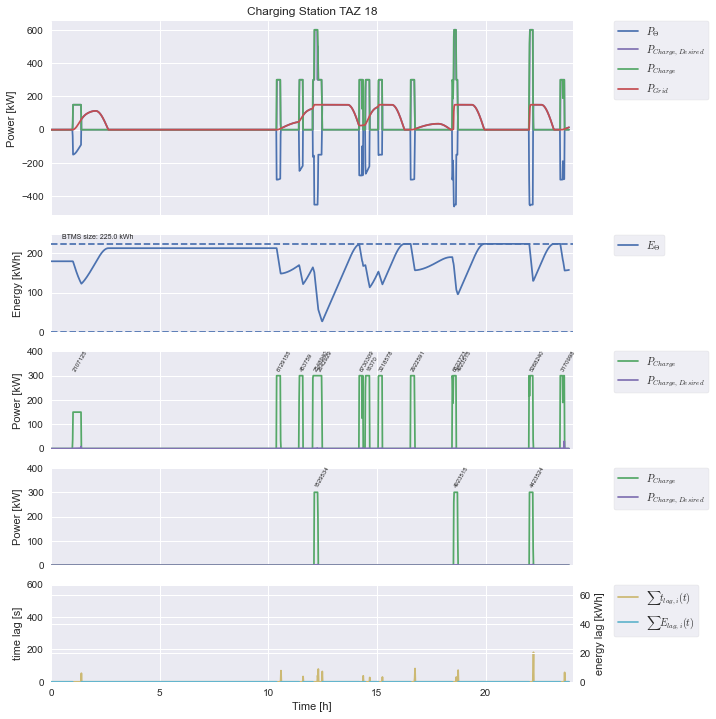

In [149]:
stations_to_plot_results = ['18'] #df_selected_stations_and_stats.index.values
#stations_to_plot_results = [str(i) for i in df_selected_stations_and_stats.index.values]

for station in stations_to_plot_results:
    # load charging station state results
    df_station_state = pd.read_csv(os.path.join(result_directory, station, 'ChargingStationState.csv'), index_col=0)
    time_vector = df_station_state.index / 3600
    num_of_stalls = df_infrastructure.loc[int(station)]['numStalls']
    # start plotting
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(3 + num_of_stalls ,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2,1,1]+ [1 for i in range(num_of_stalls)]} )
    # first ax: total power flow
    # second ax: E_BTMS of BTMS
    # following ax: power and E_vehicle of each stall
    # last ax: time_lag_sum and energy_lag_sum of all stalls

    # plot total power flow
    ax[0].plot(time_vector, df_station_state['BtmsPower'], label=r'$P_\Theta$', color=P_BTMS_color)
    ax[0].plot(time_vector, df_station_state['TotalChargingPowerDesire'], label=r'$P_{Charge,Desired}$', color=P_Charge_Desired_color)
    ax[0].plot(time_vector, df_station_state['TotalChargingPower'], label=r'$P_{Charge}$', color=P_Charge_color)
    ax[0].plot(time_vector, df_station_state['GridPower'], label=r'$P_{Grid}$', color=P_Grid_color)

    ax[0].set_ylabel('Power [kW]')
    ax[0].set_title('Charging Station TAZ ' + station)
    ax[0].legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.)
    #ax[0].legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black', facecolor='white')

    # plot E_BTMS
    _btms_size = df_selected_stations_and_stats.loc[int(station)]['btms_size']
    ax[1].axhline(y=_btms_size, linestyle='--', color=P_BTMS_color)
    ax[1].text(0.5, 1.05* _btms_size, 'BTMS size: ' + str(round(_btms_size, 2)) + ' kWh', fontsize=7)
    ax[1].axhline(y=0, linestyle='--', color=P_BTMS_color)
    ax[1].plot(time_vector, df_station_state['BtmsEnergy'], label=r'$E_\Theta$')
    ax[1].set_ylim([0, 1.1* _btms_size])
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.)

    # plot power and E_vehicle of each stall
    _bays_charging_power = convert_pd_series_to_np_array(df_station_state['BaysChargingPower'])
    _bays_charging_power_desired = convert_pd_series_to_np_array(df_station_state['BaysChargingDesire'])
    # convert nan to o in _bays_charging_power_desired
    _bays_charging_power_desired[np.isnan(_bays_charging_power_desired)] = 0

    for i in range(num_of_stalls):
        ax[i+2].plot(time_vector, _bays_charging_power[:,i], label=r'$P_{Charge}$', color=P_Charge_color)
        ax[i+2].plot(time_vector, _bays_charging_power_desired[:,i], label=r'$P_{Charge,Desired}$', color=P_Charge_Desired_color)
        # add text with vehicle id add top of each charging peak in plot, rotate by 90 degree
        # convert to list of vehicle ids
        _vehicle_ids = np.array([get_list_of_strings_from_string(x, num_of_stalls) for x in df_station_state['BaysVehicleIds']])
        #_unique_vehicle_ids = np.unique(_vehicle_ids[:,i])
        # get vehicle id only if vehicle in bay changed
        _unique_vehicle_ids = []
        for j in range(len(_vehicle_ids[:,i])):
            if len(_unique_vehicle_ids) == 0 and _vehicle_ids[j,i] != '':
                _unique_vehicle_ids.append(_vehicle_ids[j,i])
            else:
                if _vehicle_ids[j,i] != _vehicle_ids[j-1,i] and not _vehicle_ids[j,i] == '':
                    _unique_vehicle_ids.append(_vehicle_ids[j,i])
        if len(_unique_vehicle_ids) > 0:
            # for each unique vehicle id, find the time when it is charging
            for _vehicle_id in _unique_vehicle_ids:
                _vehicle_id_charging_time = np.where(_vehicle_ids == _vehicle_id)[0][0]
                _vehicle_id_charging_power = _bays_charging_power[_vehicle_id_charging_time, i]
                # add text at the peak of charging power
                _vehicle_name = _vehicle_id.split('-')[1]
                _vehicle_name = _vehicle_name.split('@')[0]
                y = _vehicle_id_charging_power
                y = 1.05 * _bays_charging_power[:,i].max()
                ax[i+2].text(time_vector[_vehicle_id_charging_time], y, _vehicle_name, rotation=60, fontsize=6, verticalalignment='bottom', horizontalalignment='left')
        ax[i+2].set_ylabel('Power [kW]')
        ax[i+2].legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.)
        ax[i+2].set_ylim([0, 400])

    # plot time_lag_sum and energy_lag_sum of all stalls
    # plo time lag on left y axis
    ax[-1].plot(time_vector, df_station_state['TimeLagSum'], label=r'$\sum_ t_{lag,i}(t)$', color=t_lag_color)
    # plot energy lag on right y axis
    ax_right = ax[-1].twinx()
    ax_right.plot(time_vector, df_station_state['EnergyLagSum'], label=r'$\sum_ E_{lag,i}(t)$', color=e_lag_color)
    # plot one legend for both y axis
    handles, labels = ax[-1].get_legend_handles_labels()
    handles2, labels2 = ax_right.get_legend_handles_labels()
    handles.extend(handles2)
    labels.extend(labels2)  
    ax[-1].legend(handles, labels, bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.)
    ax[-1].set_ylabel('time lag [s]')
    ax_right.set_ylabel('energy lag [kWh]')
    ax[-1].set_ylim([0, max([1.1* df_station_state['TimeLagSum'].max(), 600])])
    ax_right.set_ylim([0, max([1.1* df_station_state['EnergyLagSum'].max(), 0.3*_btms_size])])


    ax[-1].set_xlabel('Time [h]')
    ax[-1].set_xlim([0,24])
    plt.tight_layout()

    # save figure
    fig.savefig(figure_directory + os.sep + 'powerflow_charging_station_' + station + '.png', dpi=300, bbox_inches='tight')